Nama: Ngurah Gde Ariwhrihaspati
<br>Email: whrihaspati@gmail.com
<br>Nomor Registrasi DTS FGA 2022 ML Developer: 
1494037162101-947

In [ ]:
! unzip news.zip

Archive:  news.zip
  inflating: True.csv                


In [ ]:
import pandas as pd

df = pd.read_csv('True.csv')
df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


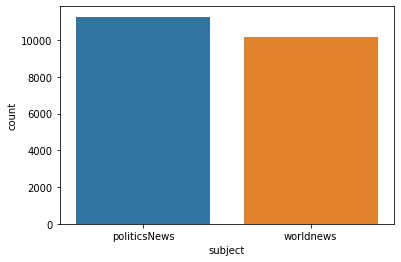

In [ ]:
import seaborn as sns

sns.countplot(data=df, x=df.subject)


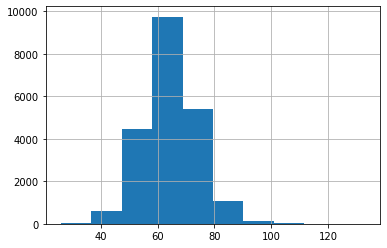

In [ ]:
df['title'].str.len().hist()

In [ ]:
df['title'].str.split( ).map(lambda x: len(x))

0        10
1         9
2        10
3         9
4        11
         ..
21412     9
21413     7
21414     7
21415     9
21416     9
Name: title, Length: 21417, dtype: int64

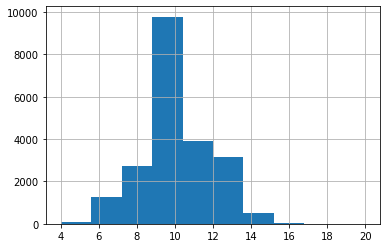

In [ ]:
df['title'].apply(lambda x: len(str(x).split())).hist()

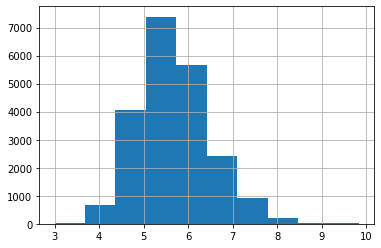

In [ ]:
import numpy as np

df['title'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

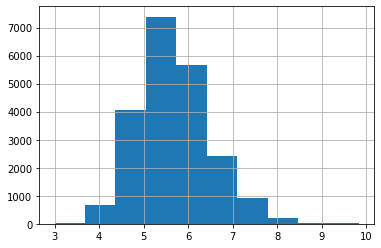

In [ ]:
df['title'].apply(lambda x: np.mean([len(w) for w in str(x).split()])).hist()

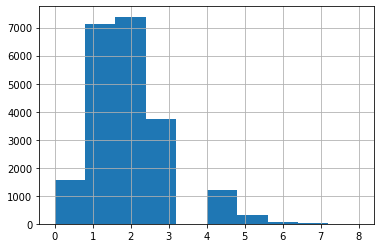

In [ ]:
from wordcloud import STOPWORDS
### Other way to retrieve stopwords
# import nltk
# nltk.download(‘stopwords’)
# stopwords =set(stopwords.words(‘english’))
df['title'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS])).hist()

In [ ]:
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
df['char_length'] = df['title'].apply(lambda x: len(str(x).split()))
df['char_length']

0        10
1         9
2        10
3         9
4        11
         ..
21412     9
21413     7
21414     7
21415     9
21416     9
Name: char_length, Length: 21417, dtype: int64

((array([-3.99487775, -3.77954452, -3.66175059, ...,  3.66175059,
          3.77954452,  3.99487775]), array([ 4,  4,  4, ..., 17, 17, 20])),
 (1.6728999276246674, 9.954475416725032, 0.98347322358986))

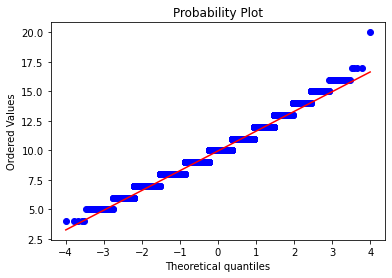

In [ ]:
stats.probplot(df['char_length'], plot=plt)

In [ ]:
print(df.title[0])
print(df.text[0])

As U.S. budget fight looms, Republicans flip their fiscal script
WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-

In [ ]:
df = df.drop(columns=['text', 'date'],axis=1)
df.head()

,title,subject
0,"As U.S. budget fight looms, Republicans flip t...",politicsNews
1,U.S. military to accept transgender recruits o...,politicsNews
2,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews
3,FBI Russia probe helped by Australian diplomat...,politicsNews
4,Trump wants Postal Service to charge 'much mor...,politicsNews


In [ ]:
category = pd.get_dummies(df.subject)
df_new = pd.concat([df, category], axis=1)
df_new.head()

,title,subject,politicsNews,worldnews
0,"As U.S. budget fight looms, Republicans flip t...",politicsNews,1,0
1,U.S. military to accept transgender recruits o...,politicsNews,1,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews,1,0
3,FBI Russia probe helped by Australian diplomat...,politicsNews,1,0
4,Trump wants Postal Service to charge 'much mor...,politicsNews,1,0


In [ ]:
df_new = df_new.drop(columns=['subject'])
df_new.head()

,title,politicsNews,worldnews
0,"As U.S. budget fight looms, Republicans flip t...",1,0
1,U.S. military to accept transgender recruits o...,1,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1,0
3,FBI Russia probe helped by Australian diplomat...,1,0
4,Trump wants Postal Service to charge 'much mor...,1,0


In [ ]:
df_new.title = df_new.title.str.lower()
df_new.head()

,title,politicsNews,worldnews
0,"as u.s. budget fight looms, republicans flip t...",1,0
1,u.s. military to accept transgender recruits o...,1,0
2,senior u.s. republican senator: 'let mr. muell...,1,0
3,fbi russia probe helped by australian diplomat...,1,0
4,trump wants postal service to charge 'much mor...,1,0


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

stop_word = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r"\w+")

df_new['title'] = df_new['title'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_word)]))
df_new['title'] = df_new['title'].map(tokenizer.tokenize)
df_new.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,title,politicsNews,worldnews
0,"[u, s, budget, fight, looms, republicans, flip...",1,0
1,"[u, s, military, accept, transgender, recruits...",1,0
2,"[senior, u, s, republican, senator, let, mr, m...",1,0
3,"[fbi, russia, probe, helped, australian, diplo...",1,0
4,"[trump, wants, postal, service, charge, much, ...",1,0


In [ ]:
title = df_new['title'].values
label = df_new.iloc[:, 1:].values

print(title.shape)
print(label.shape)

(21417,)
(21417, 2)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(title, label, test_size=0.2)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(X_train) 
 
sekuens_latih = tokenizer.texts_to_sequences(X_train)
sekuens_test = tokenizer.texts_to_sequences(X_test)
 
padded_latih = pad_sequences(sekuens_latih, padding='post', maxlen=20, truncating='post') 
padded_test = pad_sequences(sekuens_test, padding='post', maxlen=20, truncating='post')

In [ ]:
import tensorflow as tf
from keras import regularizers

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),

    tf.keras.layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
 
    tf.keras.layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
  
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
   
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
   

    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.75):
      print('\nAkurasi telah mencapai >80%!!')
      self.model.stop_training = False
callbacks = myCallback()

In [ ]:
num_epochs = 30
history = model.fit(padded_latih, y_train, epochs=num_epochs, 
                    validation_data=(padded_test, y_test), verbose=2)

Epoch 1/30
536/536 - 11s - loss: 0.3136 - accuracy: 0.8547 - val_loss: 0.2129 - val_accuracy: 0.9169 - 11s/epoch - 21ms/step
Epoch 2/30
536/536 - 8s - loss: 0.1628 - accuracy: 0.9453 - val_loss: 0.2293 - val_accuracy: 0.9150 - 8s/epoch - 15ms/step
Epoch 3/30
536/536 - 9s - loss: 0.1316 - accuracy: 0.9507 - val_loss: 0.2323 - val_accuracy: 0.9171 - 9s/epoch - 17ms/step
Epoch 4/30
536/536 - 8s - loss: 0.1006 - accuracy: 0.9603 - val_loss: 0.2650 - val_accuracy: 0.9111 - 8s/epoch - 16ms/step
Epoch 5/30
536/536 - 8s - loss: 0.0850 - accuracy: 0.9639 - val_loss: 0.2981 - val_accuracy: 0.9062 - 8s/epoch - 16ms/step
Epoch 6/30
536/536 - 10s - loss: 0.0752 - accuracy: 0.9667 - val_loss: 0.3364 - val_accuracy: 0.9038 - 10s/epoch - 18ms/step
Epoch 7/30
536/536 - 10s - loss: 0.0638 - accuracy: 0.9706 - val_loss: 0.4109 - val_accuracy: 0.9006 - 10s/epoch - 18ms/step
Epoch 8/30
536/536 - 8s - loss: 0.0581 - accuracy: 0.9701 - val_loss: 0.5330 - val_accuracy: 0.8985 - 8s/epoch - 16ms/step
Epoch 9/30

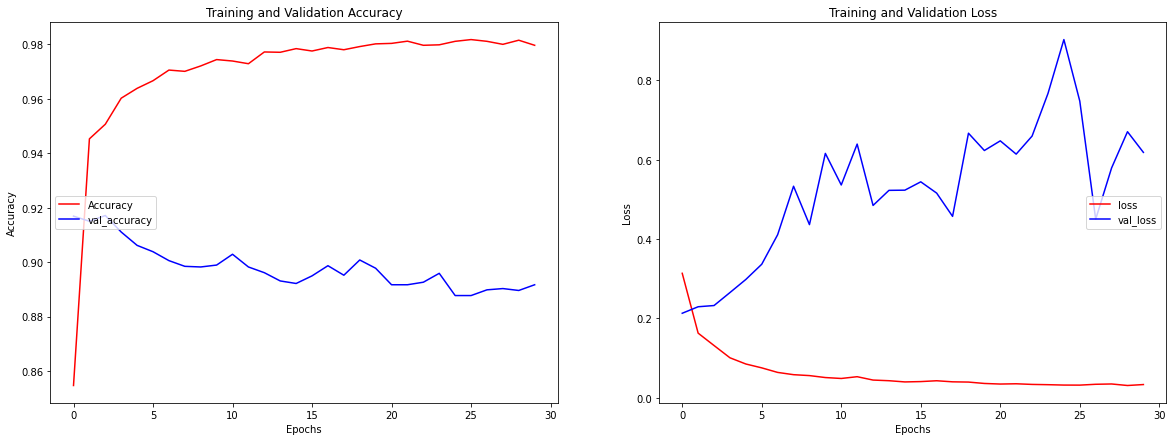

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

epochs = range(0,num_epochs)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

ax1.plot(epochs, acc, 'r', label='Accuracy')
ax1.plot(epochs, val_acc, 'b', label='val_accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend(loc='center left')
ax1.set_xlabel('Epochs')

ax2.plot(epochs, loss, 'r', label='loss')
ax2.plot(epochs, val_loss, 'b', label='val_loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend(loc='center right')
